In [271]:
import os
import numpy as np
import scipy.io as sio
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [272]:
def loadData():
    data_path = os.path.join(os.getcwd(),'data')
    data = sio.loadmat(os.path.join(data_path, 'Indian_pines_corrected.mat'))['indian_pines_corrected']
    data_gt = sio.loadmat(os.path.join(data_path, 'Indian_pines_gt.mat'))['indian_pines_gt']    
    return data, data_gt

In [273]:
data, data_gt = loadData()

In [276]:
dataset_corrected = np.array(data)
dataset_gt = np.array(data_gt)
dataset_corrected = np.swapaxes(dataset_corrected, 0, 2)

In [277]:
dataset_corrected.shape

(200, 145, 145)

In [278]:
data = np.zeros(((dataset_gt.shape[1]**2), 200))
data_gt = np.zeros(((dataset_gt.shape[1]**2), 1))

for i in range(a):
    for j in range(a):
        data[i*a+j] = dataset_corrected[:, i, j]
        data_gt[i*a+j] = dataset_gt[i,j]     

In [279]:
non_zeros = np.where(data_gt != 0)[0]

In [280]:
data = data[non_zeros]
data_gt = data_gt[non_zeros]

In [281]:
data.shape

(10249, 200)

In [282]:
data_gt.shape

(10249, 1)

In [283]:
X = data

In [284]:
# standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [285]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [286]:
# select first principal component (PC1)
X_pc1 = X_pca[:, 0]

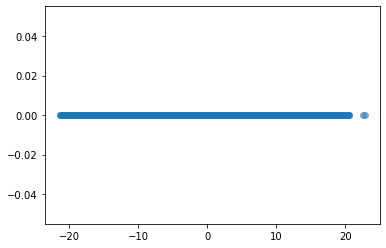

In [287]:
plt.scatter(X_pc1, y=np.zeros_like(X_pc1), alpha=0.5)
plt.show()

In [288]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [289]:
# select PC1 and PC2
X_pc1 = X_pca[:, 0]
X_pc2 = X_pca[:, 1]

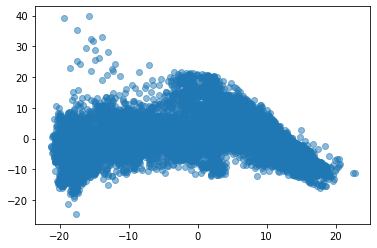

In [290]:
plt.scatter(X_pc1, X_pc2, alpha=0.5)
plt.show()

In [291]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

In [292]:
# select PC1, PC2, and PC3
X_pc1 = X_pca[:, 0]
X_pc2 = X_pca[:, 1]
X_pc3 = X_pca[:, 2]

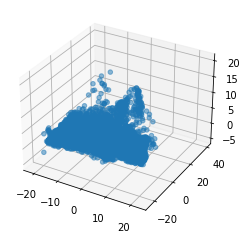

In [293]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pc1, X_pc2, X_pc3, alpha=0.5)
plt.show()